In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import quandl 
goog = quandl.get("WIKI/GOOG", start_date="2010-10-01", end_date="2018-04-15")

In [9]:
goog.tail(10)
#goog.index

goog.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03,1007.0,1007.0,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,737.247481,742.932792,730.986536,737.170777,1.801181e+06,0.0,1.0,737.247481,742.932792,730.986536,737.170777,1.801181e+06
std,176.154120,177.387911,175.051779,176.332774,9.367890e+05,0.0,0.0,176.154120,177.387911,175.051779,176.332774,9.367890e+05
min,494.650000,495.976000,487.560000,492.550000,7.900000e+03,0.0,1.0,494.650000,495.976000,487.560000,492.550000,7.900000e+03
25%,567.100000,572.205000,561.700000,567.422500,1.249419e+06,0.0,1.0,567.100000,572.205000,561.700000,567.422500,1.249419e+06
50%,726.810000,733.100000,720.500000,728.110000,1.576286e+06,0.0,1.0,726.810000,733.100000,720.500000,728.110000,1.576286e+06
75%,832.950000,837.070000,828.820000,832.030000,2.051788e+06,0.0,1.0,832.950000,837.070000,828.820000,832.030000,2.051788e+06
max,1177.330000,1186.890000,1171.980000,1175.840000,1.116494e+07,0.0,1.0,1177.330000,1186.890000,1171.980000,1175.840000,1.116494e+07


In [10]:
#check syntax
#last 10 obs of `Close`
ts = goog['Close'][-10:]
print type(ts)
print ts

sample = goog.sample(20)


<class 'pandas.core.series.Series'>
Date
2018-03-14    1149.49
2018-03-15    1149.58
2018-03-16    1135.73
2018-03-19    1099.82
2018-03-20    1097.71
2018-03-21    1090.88
2018-03-22    1049.08
2018-03-23    1021.57
2018-03-26    1053.21
2018-03-27    1005.10
Name: Close, dtype: float64


In [34]:
# sample to monthly level 
monthly_goog = goog.resample('M').mean()
# print(monthly_goog)

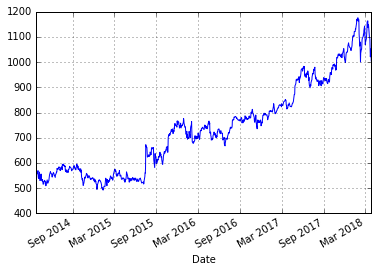

In [11]:
goog['Close'].plot(grid=True)

# Show the plot
plt.show()

In [12]:
import numpy as np

daily_close = goog[['Adj. Close']]

daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)
#print(daily_log_returns)

            Adj. Close
Date                  
2014-03-27    0.000000
2014-03-28    0.002740
2014-03-31   -0.005393
2014-04-01    0.018295
2014-04-02   -0.000282
2014-04-03    0.004832
2014-04-04   -0.046688
2014-04-07   -0.009187
2014-04-08    0.031125
2014-04-09    0.016652
2014-04-10   -0.041107
2014-04-11   -0.019133
2014-04-14    0.003619
2014-04-15    0.007361
2014-04-16    0.037469
2014-04-17   -0.036727
2014-04-21   -0.013953
2014-04-22    0.011710
2014-04-23   -0.014716
2014-04-24   -0.003378
2014-04-25   -0.017100
2014-04-28    0.001879
2014-04-29    0.020400
2014-04-30   -0.001971
2014-05-01    0.008905
2014-05-02   -0.006436
2014-05-05   -0.000227
2014-05-06   -0.024005
2014-05-07   -0.010056
2014-05-08    0.002039
...                ...
2018-02-13    0.000152
2018-02-14    0.016728
2018-02-15    0.018529
2018-02-16    0.004846
2018-02-20    0.006997
2018-02-21    0.008055
2018-02-22   -0.004238
2018-02-23    0.018217
2018-02-26    0.015052
2018-02-27   -0.022260
2018-02-28 

In [13]:
# Resample `goog` to business months, take last month's value  
monthly = goog.resample('BM').apply(lambda x: x[-1])
monthly.pct_change()

# Resample `goog` to quarters, take the mean as value per quarter
quarter = goog.resample("4M").mean()
quarter.pct_change()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-31,-0.018844,-0.013563,-0.013322,-0.007144,94.627186,NaN,0.0,-0.018844,-0.013563,-0.013322,-0.007144,94.627186
2014-11-30,0.013458,0.011099,0.015745,0.012601,-0.186766,NaN,0.0,0.013458,0.011099,0.015745,0.012601,-0.186766
2015-03-31,-0.050072,-0.047758,-0.050635,-0.048846,0.193660,NaN,0.0,-0.050072,-0.047758,-0.050635,-0.048846,0.193660
2015-07-31,0.030101,0.029697,0.031051,0.030127,0.004998,NaN,0.0,0.030101,0.029697,0.031051,0.030127,0.004998
2015-11-30,0.204667,0.207034,0.201168,0.204403,0.087820,NaN,0.0,0.204667,0.207034,0.201168,0.204403,0.087820
2016-03-31,0.097910,0.097612,0.096438,0.096806,0.072676,NaN,0.0,0.097910,0.097612,0.096438,0.096806,0.072676
2016-07-31,-0.010585,-0.013591,-0.005370,-0.009157,-0.260842,NaN,0.0,-0.010585,-0.013591,-0.005370,-0.009157,-0.260842
2016-11-30,0.078523,0.078289,0.079075,0.077836,-0.128739,NaN,0.0,0.078523,0.078289,0.079075,0.077836,-0.128739


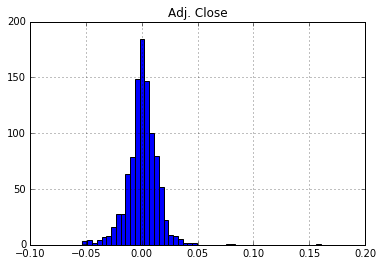

        Adj. Close
count  1007.000000
mean      0.000685
std       0.014330
min      -0.053179
25%      -0.005771
50%       0.000566
75%       0.007920
max       0.160524


In [14]:
# Plot the distribution 
daily_pct_change.hist(bins=50)
plt.show()
print(daily_pct_change.describe())



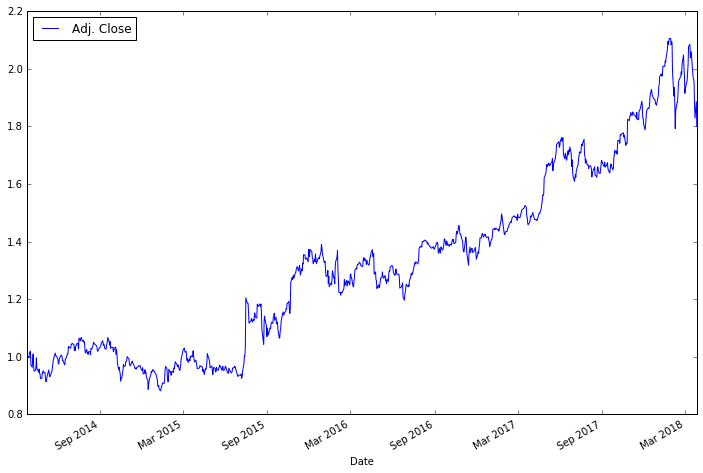

In [15]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.plot(figsize=(12,8))
plt.show()

In [16]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()


In [20]:
import datetime 

def get(ids, startdate, enddate):
  def data(ticker):
#     return (pdr.get_data_yahoo(ids, start=startdate, end=enddate))
    index = "WIKI/" + ticker
    return (quandl.get(index, start=startdate, end=enddate))
  datas = map (data, ids)
  return(pd.concat(datas, keys=ids, names=['Ticker', 'Date']))

ids = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(ids, datetime.datetime(2010, 10, 1), datetime.datetime(2018, 4, 15))



Ticker         AAPL     GOOG         IBM   MSFT
Date                                           
1962-01-02      NaN      NaN   15.099257    NaN
1962-01-03      NaN      NaN   15.231243    NaN
1962-01-04      NaN      NaN   15.079459    NaN
1962-01-05      NaN      NaN   14.782489    NaN
1962-01-08      NaN      NaN   14.505318    NaN
1962-01-09      NaN      NaN   14.676900    NaN
1962-01-10      NaN      NaN   14.703297    NaN
1962-01-11      NaN      NaN   14.861681    NaN
1962-01-12      NaN      NaN   14.888079    NaN
1962-01-15      NaN      NaN   14.954072    NaN
1962-01-16      NaN      NaN   14.795688    NaN
1962-01-17      NaN      NaN   14.558112    NaN
1962-01-18      NaN      NaN   14.597708    NaN
1962-01-19      NaN      NaN   14.610907    NaN
1962-01-22      NaN      NaN   14.584510    NaN
1962-01-23      NaN      NaN   14.439324    NaN
1962-01-24      NaN      NaN   14.518516    NaN
1962-01-25      NaN      NaN   14.360133    NaN
1962-01-26      NaN      NaN   14.287540

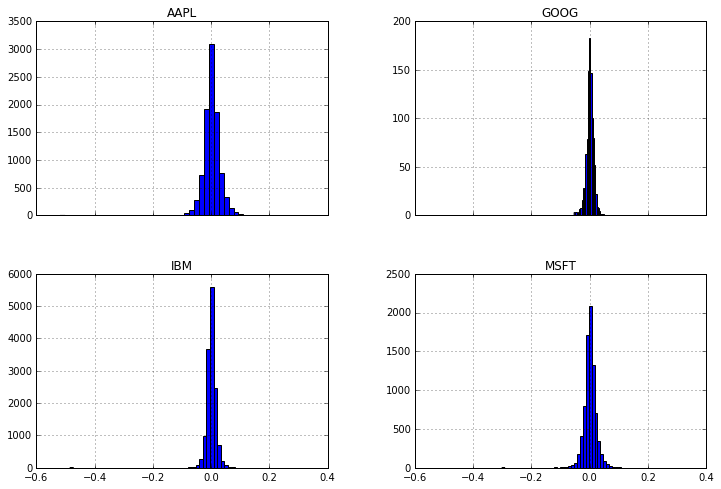

In [21]:
 # Isolate the Adj Close values and transform the DataFrame
daily_close_px = all_data[['Adj. Close']].reset_index().pivot('Date', 'Ticker', 'Adj. Close')
print daily_close_px

daily_pct_change = daily_close_px.pct_change()
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))
plt.show()

In [22]:
# #Scattering volatility
# pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

#plt.show()

In [23]:
# adj_close_px = goog['Adj. Close']
# moving_avg = adj_close_px.rolling(window=40).mean()
# print(moving_avg[-10:])

# #window rolling mean
# goog['42'] = adj_close_px.rolling(window=40).mean()

# plt.show()

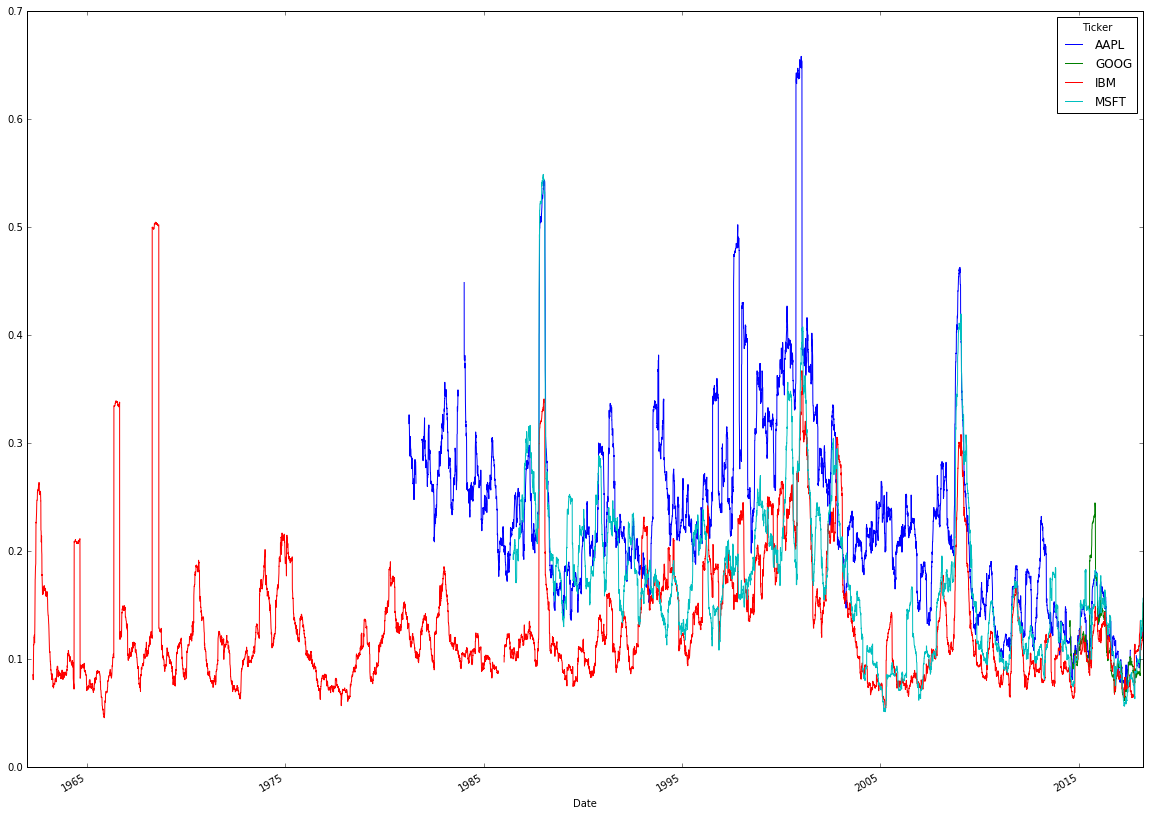

In [24]:
min_periods = 75

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot(figsize=(20, 15))
plt.show()